In [5]:
import os
example_folder = os.path.join('C:/', 'code', 'retinotopic_mapping-master','retinotopic_mapping')
os.chdir(example_folder)
from tools import FileTools as ft
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
log = ft.loadFile(r'D:\data\visual_display_log\200512174152-LocallySparseNoise-MMOUSE-USER-TEST-Triggered-complete.pkl')

In [22]:
log.keys()

dict_keys(['stimulation', 'monitor', 'indicator', 'presentation'])

In [24]:
log['presentation']

{'identifier': 'TEST',
 'psychopy_mon': 'testMonitor',
 'is_interpolate': False,
 'is_triggered': True,
 'is_by_index': True,
 'is_save_sequence': False,
 'trigger_NI_dev': 'Dev1',
 'trigger_NI_port': 0,
 'trigger_NI_line': 0,
 'trigger_event': 'positive_edge',
 'is_sync_pulse': False,
 'sync_pulse_NI_dev': 'Dev1',
 'sync_pulse_NI_port': 1,
 'sync_pulse_NI_line': 1,
 'display_screen': 1,
 'color_weights': (1.0, 1.0, 1.0),
 'initial_background_color': [0.0, 0.0, 0.0],
 'keep_display': True,
 'display_iter': 1,
 'log_dir': 'D:\\data',
 'backupdir': None,
 'mouse_id': 'MOUSE',
 'user_id': 'USER',
 'display_length': 79.3539829,
 'time_stamp': None,
 'frame_duration': array([0.1413202, 0.0055419, 0.006082 , ..., 0.0166678, 0.0167222,
        0.0166805]),
 'displayed_frames': [(0.0, None, None, -1.0),
  (0.0, None, None, -1.0),
  (0.0, None, None, -1.0),
  (0.0, None, None, -1.0),
  (0.0, None, None, -1.0),
  (0.0, None, None, -1.0),
  (0.0, None, None, -1.0),
  (0.0, None, None, -1.0),
  (0

In [8]:
a=log['monitor']['lin_coord_x']

In [21]:
stim = log['stimulation']
frames_unique = stim['frames_unique']
frames_unique[2]

(1.0,
 ([13.153568267822266, 43.98163986206055, -1.0],
  [5.153568267822266, 87.98163986206055, -1.0],
  [-26.846431732177734, 31.981639862060547, -1.0],
  [-42.846431732177734, 83.98163986206055, 1.0]),
 0,
 -1.0)

In [25]:
# ======================== monitor parameters ==================================
mon_resolution = (1200,1920) #enter your monitors resolution (height, width)
mon_width_cm = 52 #enter your monitors width in cm
mon_height_cm = 32 #enter your monitors height in cm
mon_refresh_rate = 60  #enter your monitors height in Hz

# The following variables correspond to the geometry of your setup don't worry about them for now.
mon_C2T_cm = mon_height_cm / 2.  # center (projection point from mouse eye to the monitor) to monitor top edge in cm
mon_C2A_cm = mon_width_cm / 2.  # center (projection point from mouse eye to the monitor) to monitor anterior edge in cm
mon_center_coordinates = (0., 60.) # the visual coordinates of center (altitude, azimuth)
mon_dis_cm = 15. # cm from mouse eye to the monitor
mon_downsample_rate = 10 # downsample rate of the displayed images relative to the monitor resolution.
# the both numbers in mon_resolution should be divisble by this number
# ======================== monitor parameters ==================================

# ======================== indicator parameters ================================
ind_width_cm = 3.
ind_height_cm = 3.
ind_position = 'northeast'
ind_is_sync = 'True'
ind_freq = 1.
# ======================== indicator parameters ================================

# ============================ generic stimulus parameters ======================
pregap_dur = 2.
postgap_dur = 3.
background = 0.
coordinate = 'degree'
# ===============================================================================

# ============================ LocallySparseNoise ===============================
lsn_subregion = None
lsn_min_distance = 40.
lsn_grid_space = (4., 4.)
lsn_probe_size = (4., 4.)
lsn_probe_orientation = 0.
lsn_probe_frame_num = 15
lsn_sign = 'ON-OFF'
lsn_iteration = 1
lsn_is_include_edge = True

In [26]:
import StimulusRoutines as stim
from MonitorSetup import Monitor, Indicator

C:\code\retinotopic_mapping-master\retinotopic_mapping\MonitorSetup.py:224: UserWarning: The following kwargs were not used by contour: 'linewidth'
  im1 = plt.contour(mapcorX, mapcorY, self.lin_coord_x, levels1, colors='k', linewidth=2)
C:\code\retinotopic_mapping-master\retinotopic_mapping\MonitorSetup.py:234: UserWarning: The following kwargs were not used by contour: 'linewidth'
  im2 = plt.contour(mapcorX, mapcorY, self.lin_coord_y, levels2, colors='k', linewidth=2)
C:\code\retinotopic_mapping-master\retinotopic_mapping\MonitorSetup.py:244: UserWarning: The following kwargs were not used by contour: 'linewidth'
  im3 = plt.contour(mapcorX, mapcorY, self.deg_coord_x, levels3, colors='k', linewidth=2)
C:\code\retinotopic_mapping-master\retinotopic_mapping\MonitorSetup.py:254: UserWarning: The following kwargs were not used by contour: 'linewidth'
  im4 = plt.contour(mapcorX, mapcorY, self.deg_coord_y, levels4, colors='k', linewidth=2)


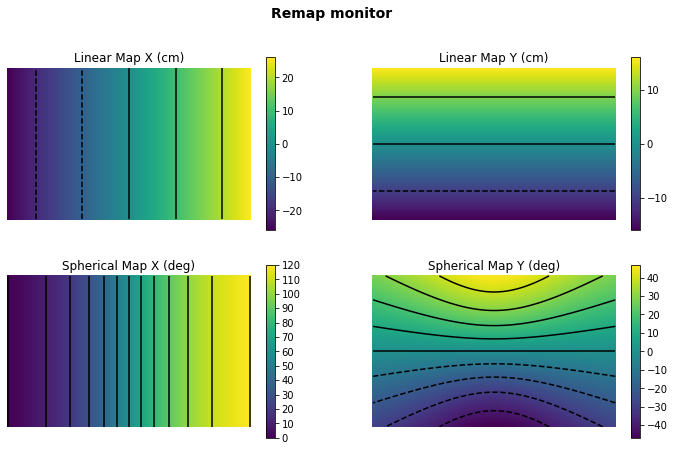

In [27]:
# Initialize Monitor object
mon = Monitor(resolution=mon_resolution, dis=mon_dis_cm, mon_width_cm=mon_width_cm, mon_height_cm=mon_height_cm,
              C2T_cm=mon_C2T_cm, C2A_cm=mon_C2A_cm, center_coordinates=mon_center_coordinates,
              downsample_rate=mon_downsample_rate)

# plot warpped monitor coordinates
mon.plot_map()
plt.show()



In [28]:
# initialize Indicator object
ind = Indicator(mon, width_cm=ind_width_cm, height_cm=ind_height_cm, position=ind_position, is_sync=ind_is_sync,
                freq=ind_freq)


# initialize LocallySparseNoise object
lsn = stim.LocallySparseNoise(monitor=mon, indicator=ind, pregap_dur=pregap_dur,
                              postgap_dur=postgap_dur, coordinate=coordinate,
                              background=background, subregion=lsn_subregion,
                              grid_space=lsn_grid_space, sign=lsn_sign,
                              probe_size=lsn_probe_size, probe_orientation=lsn_probe_orientation,
                              probe_frame_num=lsn_probe_frame_num, iteration=lsn_iteration,
                              is_include_edge=lsn_is_include_edge, min_distance=lsn_min_distance)

In [31]:
full_seq, full_dict = lsn.generate_movie_by_index()

In [41]:
full_dict.keys()

dict_keys(['stimulation', 'monitor', 'indicator'])

In [42]:
frames = full_dict['stimulation']['frames_unique']

In [51]:
mon = full_dict['monitor']

In [53]:
lsn.frames_unique

((0.0, None, None, -1.0),
 (1.0,
  ([25.153568267822266, 51.98163986206055, -1.0],
   [5.153568267822266, 87.98163986206055, 1.0],
   [-10.846431732177734, 31.981639862060547, -1.0],
   [-38.846431732177734, 91.98163986206055, -1.0]),
  0,
  1.0),
 (1.0,
  ([25.153568267822266, 51.98163986206055, -1.0],
   [5.153568267822266, 87.98163986206055, 1.0],
   [-10.846431732177734, 31.981639862060547, -1.0],
   [-38.846431732177734, 91.98163986206055, -1.0]),
  0,
  -1.0),
 (1.0,
  ([17.153568267822266, 27.981639862060547, -1.0],
   [-10.846431732177734, 87.98163986206055, -1.0],
   [-22.846431732177734, 47.98163986206055, 1.0],
   [33.153568267822266, 67.98163986206055, 1.0]),
  0,
  1.0),
 (1.0,
  ([17.153568267822266, 27.981639862060547, -1.0],
   [-10.846431732177734, 87.98163986206055, -1.0],
   [-22.846431732177734, 47.98163986206055, 1.0],
   [33.153568267822266, 67.98163986206055, 1.0]),
  0,
  -1.0),
 (1.0,
  ([13.153568267822266, 83.98163986206055, 1.0],
   [5.153568267822266, 31.98

In [52]:
mon.keys()

dict_keys(['resolution', 'dis', 'mon_width_cm', 'mon_height_cm', 'C2T_cm', 'C2A_cm', 'center_coordinates', 'visual_field', 'deg_coord_x', 'deg_coord_y', 'name', 'downsample_rate', 'gamma', 'gamma_grid', 'luminance', 'refresh_rate', 'C2B_cm', 'C2P_cm', 'lin_coord_x', 'lin_coord_y'])

In [54]:
frames[2] #[0]: stim frames [1]:tuple with stim locations (before warping) and -1 1 indicating dark/light [2]iteration? [3]: indicator value

(1.0,
 ([25.153568267822266, 51.98163986206055, -1.0],
  [5.153568267822266, 87.98163986206055, 1.0],
  [-10.846431732177734, 31.981639862060547, -1.0],
  [-38.846431732177734, 91.98163986206055, -1.0]),
 0,
 -1.0)

In [ ]:
dm = stim.get_warped_probes()

In [49]:
lsn.coordinate

'degree'

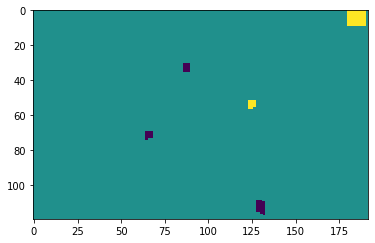

In [46]:
plt.imshow(full_seq[1,:,:])